In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
pd.set_option('display.max_rows', None)

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
# If local file
titanic = pd.read_csv('titanic/train.csv')

#If colab file
#titanic = pd.read_csv('train.csv')

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic.shape

(891, 12)

In [16]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
titanic.Embarked.isnull().sum()

2

In [21]:
titanic.Embarked.fillna("C", inplace=True)

In [24]:
titanic.Cabin.tail(20)

871            D35
872    B51 B53 B55
873              Z
874              Z
875              Z
876              Z
877              Z
878              Z
879            C50
880              Z
881              Z
882              Z
883              Z
884              Z
885              Z
886              Z
887            B42
888              Z
889           C148
890              Z
Name: Cabin, dtype: object

In [18]:
titanic.Cabin.isnull().sum()

687

In [22]:
# null to a value of cabin
titanic.Cabin.fillna("Z", inplace=True)

In [25]:
'B51 B53 B55'[0]

'B'

In [26]:
titanic.Cabin = [cabina[0] for cabina in titanic.Cabin]

In [27]:
titanic.Cabin.head()

0    Z
1    C
2    Z
3    C
4    Z
Name: Cabin, dtype: object

We can try to assign a cabin using the ticket fare

In [28]:
titanic.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     13.581250
F     18.696792
Z     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [29]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
titanic.Fare.isnull().sum()

0

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
titanic['Sex'] = titanic.Sex.apply(lambda x: 0 if x == "female" else 1)

In [36]:
titanic.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [37]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,S


sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic

In [38]:
titanic['family_size'] = titanic.SibSp + titanic.Parch+1

In [39]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Z,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Z,S,1


In [40]:
titanic.drop(['Ticket'], axis=1, inplace=True)

In [41]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,Z,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,Z,S,1


In [42]:
titanic.drop(['PassengerId'], axis=1, inplace=True)

In [43]:
titanic.drop(['Name','SibSp','Parch'], axis=1, inplace=True)

In [44]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'family_size'],
      dtype='object')

We are missing the age, we need to do something about it.

In [47]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

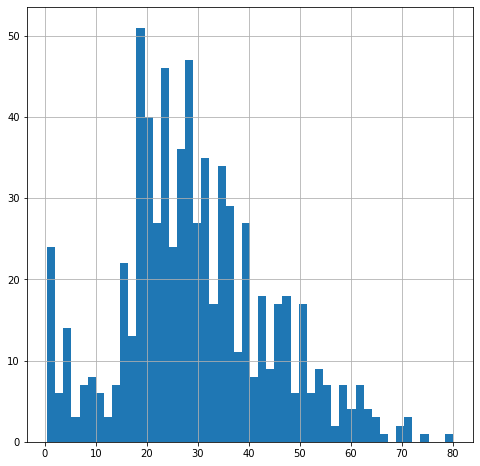

In [53]:
titanic.Age.hist(bins=50, figsize=(8,8))

In [54]:
titanic.Age.fillna(28, inplace=True)

In [55]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_size
0,0,3,1,22.0,7.2500,Z,S,2
1,1,1,0,38.0,71.2833,C,C,2
2,1,3,0,26.0,7.9250,Z,S,1
3,1,1,0,35.0,53.1000,C,S,2
4,0,3,1,35.0,8.0500,Z,S,1


In [61]:
titanic.Cabin.value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
1      1
Name: Cabin, dtype: int64

In [60]:
titanic.loc[titanic['Cabin']=='T', 'Cabin'] = 1

In [66]:
titanic.loc[titanic['Cabin']=='G', 'Cabin'] = 2
titanic.loc[titanic['Cabin']=='F', 'Cabin'] = 3
titanic.loc[titanic['Cabin']=='A', 'Cabin'] = 4
titanic.loc[titanic['Cabin']=='E', 'Cabin'] = 5
titanic.loc[titanic['Cabin']=='D', 'Cabin'] = 6
titanic.loc[titanic['Cabin']=='B', 'Cabin'] = 7
titanic.loc[titanic['Cabin']=='C', 'Cabin'] = 8
titanic.loc[titanic['Cabin']=='Z', 'Cabin'] = 9

In [63]:
titanic.Embarked.value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [64]:
titanic.loc[titanic['Embarked']=='S', 'Embarked'] = 1
titanic.loc[titanic['Embarked']=='C', 'Embarked'] = 2
titanic.loc[titanic['Embarked']=='Q', 'Embarked'] = 3

In [67]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_size
0,0,3,1,22.0,7.2500,9,1,2
1,1,1,0,38.0,71.2833,8,2,2
2,1,3,0,26.0,7.9250,9,1,1
3,1,1,0,35.0,53.1000,8,1,2
4,0,3,1,35.0,8.0500,9,1,1


In [45]:
train_cols = [ 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'family_size']

In [68]:
# X is the explicative data, Y is the class to predict

X = titanic.drop(['Survived'], axis = 1)

#X = titanic[train_cols]

y = titanic['Survived']

In [69]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = .3, random_state = 20210604)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold

max_depth = range(1,30)
max_feature = [2,4,6,'auto']

criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}

grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=True, 
                                n_jobs = -1)
grid.fit(train_x, train_y)

Fitting 5 folds for each of 232 candidates, totalling 1160 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [2, 4, 6, 'auto']},
             verbose=True)

In [79]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}
0.8137032258064515
DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto')


In [80]:
dectree_grid = grid.best_estimator_
## use the best paremeters of the tree
dectree_grid.score(X,y)

0.8496071829405163

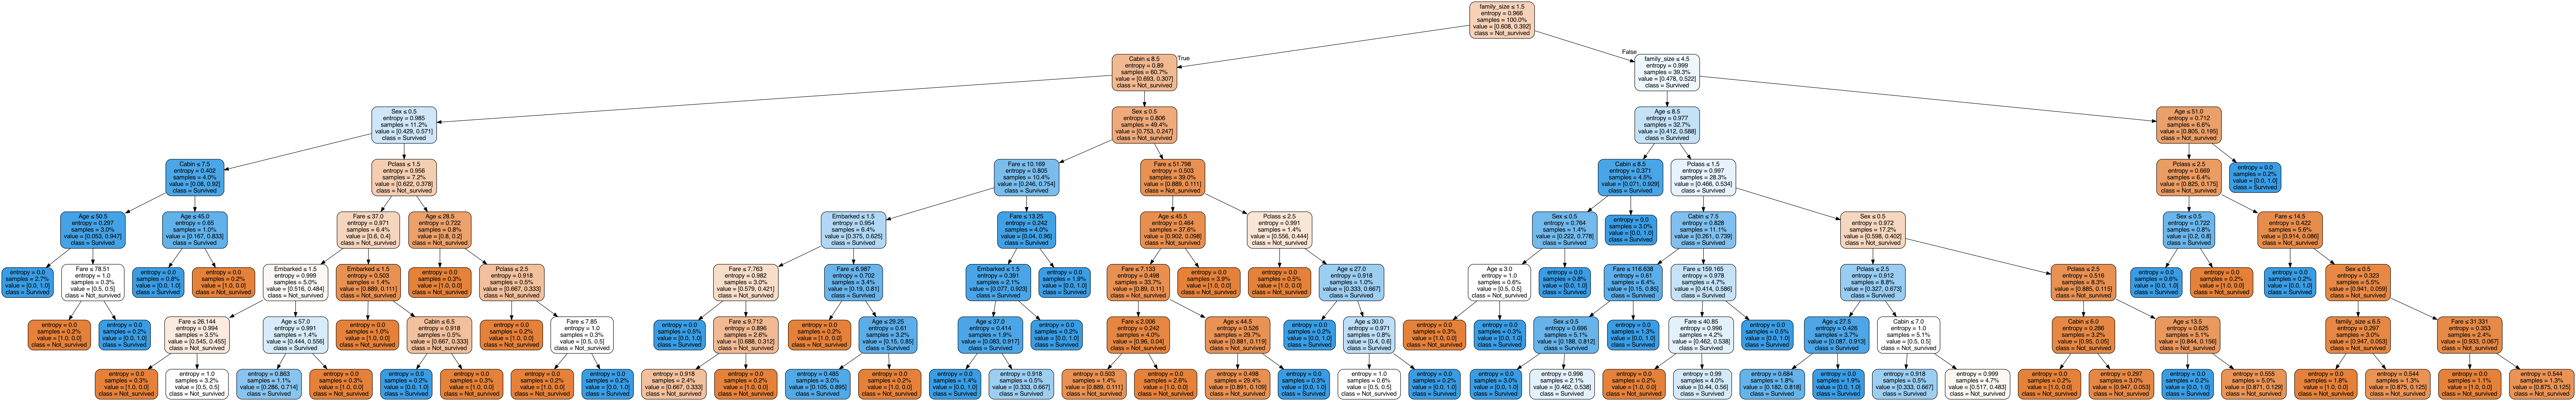

In [81]:

from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=train_cols,  class_names = (["Survived" if int(i) == 1 else "Not_survived" for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())